# Library Import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to Read Data and Return 2 Dataframes

In [3]:
countries=["China", "France", "Germany", "India", "Iraq", "World"]
indic=["Electric power consumption (kWh per capita)", "CO2 emissions (kt)"]

In [4]:
def fet_transform(df1):
    df1cols=df1.columns
    df1idx=df1.index
    df1arr=np.array(df1.values,float)
    df1=pd.DataFrame(df1arr,columns=df1cols,index=df1idx)
    return df1

In [5]:
def filterdata(file):
    file=file[(file['Indicator Name']==indic[0])|((file['Indicator Name']==indic[1]))]
    fltr=file['Country Name'].isin(countries)
    file=file[fltr]
    cntr=file['Country Name'].tolist()
    indx=file['Indicator Name'].tolist()
    d1=[]
    for i in range(len(indx)):
        d1.append(cntr[i]+"-"+indx[i])
    file.insert(4,"Country with Indicator",d1)
    return file

In [6]:
def readdata(dtaname):
    data=open(dtaname,"r+").read() 
    truncate=85
    data=data[truncate:]
    dta=open("tempdata.csv","w+").write(data) 
    dta=pd.read_csv("tempdata.csv")
    dta=dta.fillna(dta.mean())
    yrcols=dta.columns.tolist()[4:-1]
    dta=filterdata(dta)    
    dta1=dta.T.iloc[4:][:-1]
    dta=dta.reset_index(drop=True).drop(['Unnamed: 65','Country Code','Indicator Code','Country with Indicator'],axis=1)
    dta1.columns=dta1.iloc[0]
    dta1=dta1.iloc[1:]
    dta1['Year']=yrcols
    dta1=dta1.set_index("Year")
    return dta,dta1  

In [7]:
data,data1=readdata("API_19_DS2_en_csv_v2_3931355.csv")

In [8]:
data.head()   # First Data with Year Column

,Country Name,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,China,CO2 emissions (kt),7.807263e+05,5.520668e+05,4.403590e+05,4.366957e+05,4.369230e+05,4.759729e+05,5.227895e+05,4.332340e+05,...,9.278250e+06,9.533210e+06,9.936680e+06,9.894940e+06,9.830430e+06,9.814310e+06,1.001777e+07,1.031346e+07,3.435867e+07,4.320922e+07
1,China,Electric power consumption (kWh per capita),2.015940e+07,1.476890e+07,1.488896e+07,1.642074e+07,1.688664e+07,1.753013e+07,1.965494e+07,1.971973e+07,...,3.295785e+03,3.466020e+03,3.757185e+03,3.905318e+03,1.375829e+09,1.352424e+07,1.553889e+07,1.709443e+07,3.435867e+07,4.320922e+07
2,Germany,CO2 emissions (kt),2.015940e+07,1.476890e+07,1.488896e+07,1.642074e+07,1.688664e+07,1.753013e+07,1.965494e+07,1.971973e+07,...,7.463800e+05,7.600200e+05,7.776300e+05,7.374900e+05,7.423100e+05,7.471500e+05,7.322000e+05,7.095400e+05,3.435867e+07,4.320922e+07
3,Germany,Electric power consumption (kWh per capita),1.586749e+03,1.683415e+03,1.790687e+03,1.916928e+03,2.060547e+03,2.194206e+03,2.300500e+03,2.362909e+03,...,7.281272e+03,7.270153e+03,7.217529e+03,7.035483e+03,1.375829e+09,1.352424e+07,1.553889e+07,1.709443e+07,3.435867e+07,4.320922e+07
4,France,CO2 emissions (kt),2.712187e+05,2.812112e+05,2.987065e+05,3.340197e+05,3.453031e+05,3.518523e+05,3.472356e+05,3.720098e+05,...,3.335300e+05,3.363300e+05,3.366300e+05,3.045300e+05,3.105200e+05,3.127100e+05,3.163600e+05,3.099600e+05,3.435867e+07,4.320922e+07


In [9]:
data1.head()   # second data with country column

Country with Indicator,China-CO2 emissions (kt),China-Electric power consumption (kWh per capita),Germany-CO2 emissions (kt),Germany-Electric power consumption (kWh per capita),France-CO2 emissions (kt),France-Electric power consumption (kWh per capita),India-CO2 emissions (kt),India-Electric power consumption (kWh per capita),Iraq-CO2 emissions (kt),Iraq-Electric power consumption (kWh per capita),World-CO2 emissions (kt),World-Electric power consumption (kWh per capita)
Year,,,,,,,,,,,,
1960,780726.302,20159401.163406,20159401.163406,1586.749415,271218.654,1462.709801,120581.961,20159401.163406,8265.418,20159401.163406,9463838.499902,20159401.163406
1961,552066.85,14768896.898304,14768896.898304,1683.414913,281211.229,1550.384939,130402.187,14768896.898304,8720.126,14768896.898304,9423934.423683,14768896.898304
1962,440359.029,14888963.885678,14888963.885678,1790.686877,298706.486,1654.215638,143467.708,14888963.885678,9031.821,14888963.885678,9732505.890225,14888963.885678
1963,436695.696,16420743.87221,16420743.87221,1916.927528,334019.696,1751.161074,154083.673,16420743.87221,9394.854,16420743.87221,10274503.991073,16420743.87221
1964,436923.05,16886643.335033,16886643.335033,2060.547354,345303.055,1896.889911,150647.694,16886643.335033,9075.825,16886643.335033,10820253.007307,16886643.335033


# Data Analysis

In [10]:
elec,co2=[],[]
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
for i in range(len(countries)):
    datat=data[data['Country Name']==countries[i]]
    datat=datat.drop('Indicator Name',axis=1)
    print("               Statistics for {}".format(countries[i]))
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("Electric power consumption (Average) for {} => {}".format(countries[i],round(datat.iloc[0,1:].mean(),2)))
    print("CO2 emissions (Average) for {} => {}".format(countries[i],round(datat.iloc[1,1:].mean(),2)))
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    elec.append(round(datat.iloc[0,1:].mean(),2))
    co2.append(round(datat.iloc[1,1:].mean(),2))
data_statistics=pd.DataFrame({"Country":countries,"Electric power consumption":elec,"CO2 emissions":co2})
data_statistics=data_statistics.sort_values(by="CO2 emissions")
data_statistics

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
               Statistics for China
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Electric power consumption (Average) for China => 4627158.44
CO2 emissions (Average) for China => 27977973.82
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
               Statistics for France
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Electric power consumption (Average) for France => 1642996.23
CO2 emissions (Average) for France => 24587475.32
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
               Statistics for Germany
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Electric power consumption (Average) for Germany => 19841019.71
CO2 emissions (Average) for Germany => 24587821.25
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
               Statistics for India
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

,Country,Electric power consumption,CO2 emissions
1,France,1642996.23,24587475.32
2,Germany,19841019.71,24587821.25
3,India,2020501.73,27977436.24
4,Iraq,1338405.43,27977929.44
0,China,4627158.44,27977973.82
5,World,22270442.62,27978719.21


In [11]:
data_statistics=data_statistics.set_index("Country")

<AxesSubplot:>

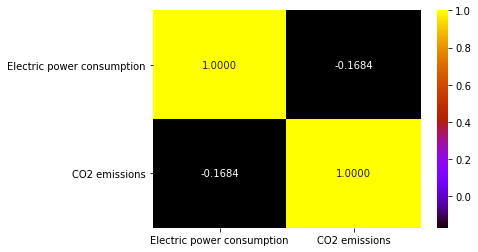

In [12]:
sns.heatmap(data_statistics.corr(),annot=True,fmt="0.4f",cmap="gnuplot")

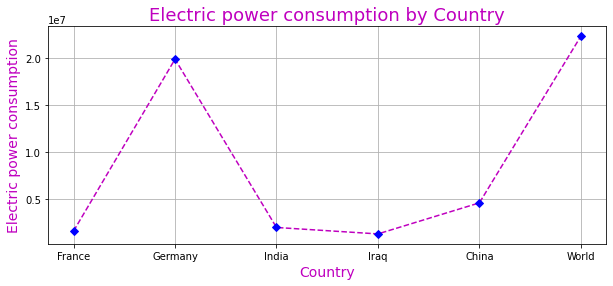

In [13]:
plt.figure(figsize=(10,4))
plt.plot(data_statistics['Electric power consumption'],"m--")
plt.plot(data_statistics['Electric power consumption'],"Db")
plt.title("Electric power consumption by Country",fontsize=18,color="m")
plt.xlabel("Country",fontsize=14,color="m")
plt.ylabel("Electric power consumption",fontsize=14,color="m")
plt.grid()
plt.show()

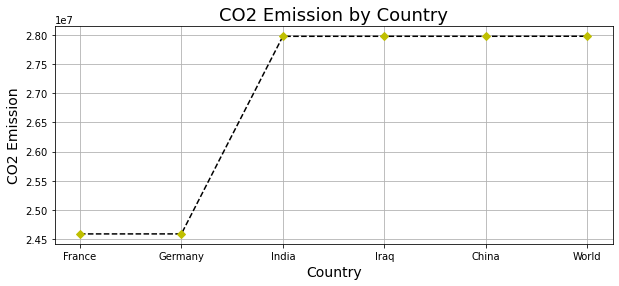

In [14]:
plt.figure(figsize=(10,4))
plt.plot(data_statistics['CO2 emissions'],"k--")
plt.plot(data_statistics['CO2 emissions'],"Dy")
plt.title("CO2 Emission by Country",fontsize=18,color="k")
plt.xlabel("Country",fontsize=14,color="k")
plt.ylabel("CO2 Emission",fontsize=14,color="k")
plt.grid()
plt.show()

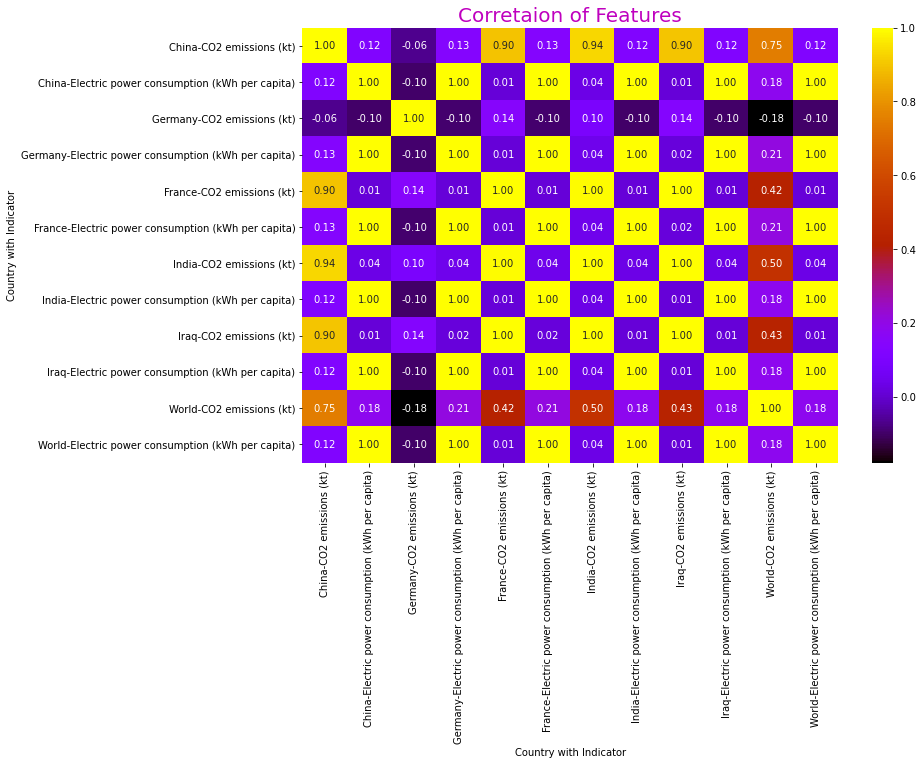

In [17]:
data1=fet_transform(data1)
plt.figure(figsize=(12,8))
plt.title("Corretaion of Features",fontsize=20,color="m")
sns.heatmap(data1.corr(),annot=True,fmt="0.2f",cmap="gnuplot")
plt.show()